# Lab 7-1: Tips

Author: Seungjae Lee (이승재)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

MLE(Maximum Likelihood Estimatin (MLE):
압정을 바닥으로 던졌을때
1. 납작한 면이 바닥으로 떨어지는경우
2. 날카로운면이 바닥으로 떨어지는 경우

=> 베르누이 분포: Binary Classification

Binomial
-> 압정을 100번 던졌을때 n = 100
-> (class1) k = 27

K ~ B(n,0)
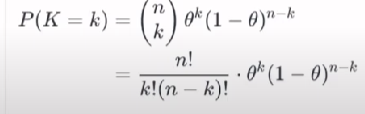

즉 Likelilhood 가 max가 되는곳. 세타를 바꿔가면서 최대가 되는 지점을 찾아본다. theta = 0.27
Observation을 가장 잘 설명하는 theta를 찾아내는 과정

Local Maximam 

Overfitting 그 데이터를 가장 잘 찾는것을 찾다보니 생길수 밖에 없다
-> Training Set, Validation Set, Test Set

Overfitting 방지:
- More Data
- Less Features
- Regularization
=> EarlyStopping: Validation Loss 가 낮아지지 않을때
=> Reducing Network Size
=> Weight Decay
=> Dropout
=> Batch Normalization



## Training and Test Datasets

In [3]:
x_train = torch.FloatTensor([[1, 2, 1],
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0])

In [4]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

## Model

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3)
    def forward(self, x):
        return self.linear(x)

In [5]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,3)

  def forward(self,x):
    return self.linear(x)

In [6]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [7]:
optimizer = optim.SGD(model.parameters(), lr =0.1)

In [35]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)
        #[X_train] = (m,3)
        #[prediction] = (m,3)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)
        #[y_train] = (m,3)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [29]:
def train(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):
    prediction = model(x_train)
    #1. max(1) 에서 1은 dimemsion을 말한다 즉 0이면 column 7개중의 max를 
    #   1이면 한 row에 있는 3개중의 max를 뽑아낸다 

    #2. prediciton.max(1)[1]에서 [1]을 하는 이유는 [0]에는 제일 높은 값을, 
    # [1] 에는 높은 값의 위치를 반환해주기 때문이다
    # EX)
    # torch.return_types.max(
    #    values=tensor([ 1.2810,  0.7681,  0.4435,  0.2231, -0.1340,  1.0643,  0.2830,  0.5408],
    #    grad_fn=<MaxBackward0>),indices=tensor([2, 2, 1, 1, 0, 1, 1, 0])
    
    predicted_classes = prediction.max(1)[1]
    print("predicted_classes: ", predicted_classes)
    print("prediction: ", prediction)
    cost = F.cross_entropy(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print(
      'Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item())
    )

In [23]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    print("predicted_classes: ", predicted_classes)
    print("prediction: ", prediction)
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [13]:
def test(model, optimizer, x_test, y_test):
  prediction = model(x_test)
  predicted_classes = prediction.max(1)[1]
  correct_count = (predicted_classes == y_test).sum().item()
  cost = F.cross_entropy(prediction, y_test)

  print('Accuracy: {}% Cost: {:.6f}'.format(
      correct_count / len(y_test) * 100, cost.item()
  ))

In [36]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 200090.921875
Epoch    1/20 Cost: 1105673.875000
Epoch    2/20 Cost: 646816.375000
Epoch    3/20 Cost: 1064450.750000
Epoch    4/20 Cost: 1935385.250000
Epoch    5/20 Cost: 307693.093750
Epoch    6/20 Cost: 1494736.375000
Epoch    7/20 Cost: 668691.375000
Epoch    8/20 Cost: 661218.500000
Epoch    9/20 Cost: 541635.187500
Epoch   10/20 Cost: 1676443.125000
Epoch   11/20 Cost: 261552.140625
Epoch   12/20 Cost: 1099382.750000
Epoch   13/20 Cost: 818691.375000
Epoch   14/20 Cost: 1115072.625000
Epoch   15/20 Cost: 1478513.250000
Epoch   16/20 Cost: 738486.250000
Epoch   17/20 Cost: 827507.750000
Epoch   18/20 Cost: 643767.250000
Epoch   19/20 Cost: 135823.015625


In [ ]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


## Learning Rate

Gradient Descent 에서의 $\alpha$ 값

`optimizer = optim.SGD(model.parameters(), lr=0.1)` 에서 `lr=0.1` 이다

learning rate이 너무 크면 diverge 하면서 cost 가 점점 늘어난다 (overshooting).

In [31]:
model = SoftmaxClassifierModel()

In [32]:
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [34]:
optimizer = optim.SGD(model.parameters(), lr = 1e5)

In [37]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 400614.625000
Epoch    1/20 Cost: 997820.250000
Epoch    2/20 Cost: 532829.750000
Epoch    3/20 Cost: 214623.296875
Epoch    4/20 Cost: 721298.750000
Epoch    5/20 Cost: 759541.437500
Epoch    6/20 Cost: 369364.625000
Epoch    7/20 Cost: 938445.250000
Epoch    8/20 Cost: 782753.875000
Epoch    9/20 Cost: 1232260.125000
Epoch   10/20 Cost: 1282693.125000
Epoch   11/20 Cost: 822861.250000
Epoch   12/20 Cost: 780632.875000
Epoch   13/20 Cost: 645927.125000
Epoch   14/20 Cost: 819893.125000
Epoch   15/20 Cost: 459963.750000
Epoch   16/20 Cost: 1258798.750000
Epoch   17/20 Cost: 371257.812500
Epoch   18/20 Cost: 1036552.125000
Epoch   19/20 Cost: 640566.375000


learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

In [38]:
model = SoftmaxClassifierModel()

In [39]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [45]:
optimizer = optim.SGD(model.parameters(), lr= 0.01)

In [46]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.896639
Epoch    1/20 Cost: 0.896199
Epoch    2/20 Cost: 0.895759
Epoch    3/20 Cost: 0.895321
Epoch    4/20 Cost: 0.894884
Epoch    5/20 Cost: 0.894447
Epoch    6/20 Cost: 0.894011
Epoch    7/20 Cost: 0.893576
Epoch    8/20 Cost: 0.893142
Epoch    9/20 Cost: 0.892708
Epoch   10/20 Cost: 0.892275
Epoch   11/20 Cost: 0.891843
Epoch   12/20 Cost: 0.891412
Epoch   13/20 Cost: 0.890981
Epoch   14/20 Cost: 0.890552
Epoch   15/20 Cost: 0.890122
Epoch   16/20 Cost: 0.889694
Epoch   17/20 Cost: 0.889266
Epoch   18/20 Cost: 0.888840
Epoch   19/20 Cost: 0.888413


적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자.

In [47]:
model = SoftmaxClassifierModel()

In [48]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [49]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 1.341574
Epoch    1/20 Cost: 1.198802
Epoch    2/20 Cost: 1.150877
Epoch    3/20 Cost: 1.131977
Epoch    4/20 Cost: 1.116242
Epoch    5/20 Cost: 1.102514
Epoch    6/20 Cost: 1.089676
Epoch    7/20 Cost: 1.077479
Epoch    8/20 Cost: 1.065775
Epoch    9/20 Cost: 1.054511
Epoch   10/20 Cost: 1.043655
Epoch   11/20 Cost: 1.033187
Epoch   12/20 Cost: 1.023091
Epoch   13/20 Cost: 1.013356
Epoch   14/20 Cost: 1.003968
Epoch   15/20 Cost: 0.994917
Epoch   16/20 Cost: 0.986189
Epoch   17/20 Cost: 0.977775
Epoch   18/20 Cost: 0.969661
Epoch   19/20 Cost: 0.961836


## Data Preprocessing (데이터 전처리)

데이터를 zero-center하고 normalize하자.

In [50]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

$$ x'_j = \frac{x_j - \mu_j}{\sigma_j} $$

여기서 $\sigma$ 는 standard deviation, $\mu$ 는 평균값 이다.

In [51]:
mu = x_train.mean(dim=0)

In [52]:
sigma = x_train.std(dim=0)

In [53]:
norm_x_train = (x_train - mu) / sigma

In [55]:
mu = x_train.mean(dim=0)
sigma = x_train.std(dim=0)
norm_x_train = (x_train-mu) / sigma

In [54]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


Normalize와 zero center한 X로 학습해서 성능을 보자

In [ ]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [56]:
class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3,1)
  
  def forward(self,x):
    return self.linear(x)

In [57]:
model = MultivariateLinearRegressionModel()

In [58]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [59]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [62]:
def train(model, optimizer, x_train, y_train):
  nb_epochs  = 20
  for epoch in range(nb_epochs):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [64]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.673828
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934174
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313782
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450401
Epoch   18/20 Cost: 10.077809
Epoch   19/20 Cost: 6.633700


## Overfitting

너무 학습 데이터에 한해 잘 학습해 테스트 데이터에 좋은 성능을 내지 못할 수도 있다.

이것을 방지하는 방법은 크게 세 가지인데:

1. 더 많은 학습 데이터
2. 더 적은 양의 feature
3. **Regularization**

Regularization: Let's not have too big numbers in the weights

In [66]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [74]:
def train_with_regularization(model, optimizer, x_train, y_train):
  nb_epochs = 20
  for epoch in range(nb_epochs):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    l2_reg = 0
    for params in model.parameters():
      l2_reg += torch.norm(params)

    cost+= l2_reg
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch+1, nb_epochs, cost.item()
    ))

In [75]:
model = MultivariateLinearRegressionModel()

In [76]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [77]:
train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29475.767578
Epoch    2/20 Cost: 18791.171875
Epoch    3/20 Cost: 12053.740234
Epoch    4/20 Cost: 7769.610352
Epoch    5/20 Cost: 5035.856934
Epoch    6/20 Cost: 3288.601074
Epoch    7/20 Cost: 2171.032715
Epoch    8/20 Cost: 1455.978271
Epoch    9/20 Cost: 998.392273
Epoch   10/20 Cost: 705.545166
Epoch   11/20 Cost: 518.118896
Epoch   12/20 Cost: 398.159241
Epoch   13/20 Cost: 321.377930
Epoch   14/20 Cost: 272.230255
Epoch   15/20 Cost: 240.768875
Epoch   16/20 Cost: 220.626984
Epoch   17/20 Cost: 207.729843
Epoch   18/20 Cost: 199.469604
Epoch   19/20 Cost: 194.177429
Epoch   20/20 Cost: 190.785126
